In [1]:
# Importing required packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import re
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from statistics import mode
from nltk.tokenize import word_tokenize
import json
import plotly  as py
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.graph_objs as ob

ModuleNotFoundError: No module named 'plotly'

In [2]:
conda install -c conda-forge jupyterlab-plotly-extension


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/apple/anaconda3

  added / updated specs:
    - jupyterlab-plotly-extension


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         151 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    jupyterlab-plotly-extension-1.0.0|             py_0           9 KB  conda-forge
    nodejs-6.13.1              |                0        10.7 MB  conda-forge
    openssl-1.1.1g             |       h0b31af3_0         1.9 MB  conda-forge
    python_abi-3.7             |          1_c

In [7]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: wordcloud


In [8]:
#conda install -c conda-forge/label/cf202003 jupyterlab-plotly-extension

In [5]:
sarcasm_master = pd.read_json("Sarcasm_Headlines_Dataset.json" , lines = True)
sarcasm_master.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
## Reading the Data 
sarcasm_master = pd.read_json("C:/Users/Anjali Shalimar/Documents/DM project/"+ 'sarcasm_master.json',lines=True)

ValueError: Expected object or value

In [10]:
sarcasm_master.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
## Taking 70% of the data for training and EDA 
training_set, testing_set =train_test_split(sarcasm_master,shuffle= True,test_size=0.3,random_state=15782)
training_set = training_set.reset_index()
training_set.head()

,index,article_link,headline,is_sarcastic
0,21883,https://entertainment.theonion.com/thats-what-...,that's what host of 'showtime at the apollo' t...,1
1,12269,https://local.theonion.com/area-woman-didnt-sa...,area woman didn't say that; you said that,1
2,14802,https://www.huffingtonpost.com/entry/aibnb-par...,want to sleep in 'the world's largest grave'? ...,0
3,11768,https://local.theonion.com/man-at-bar-clinging...,man at bar clinging to muted 'king of queens' ...,1
4,11262,https://www.theonion.com/portrait-of-nude-blee...,"portrait of nude, bleeding man hung on school ...",1


In [7]:
## Data Shape Summary
print(training_set.shape)
print(testing_set.shape)
print(sarcasm_master.shape)

(18696, 4)
(8013, 3)
(26709, 3)


<Figure size 1800x1080 with 0 Axes>

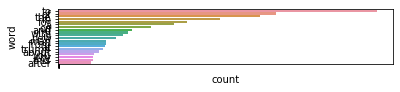

In [9]:
## Frequency ditsribution of most commonly occuring words in the headlines
plt.figure(figsize=(25, 15))
words_count = sarcasm_master['headline'].str.split(expand=True).unstack().value_counts()
data = pd.DataFrame({'word':words_count.index.values[:20],'count':words_count.values[:20]})

sns.palplot(sns.color_palette("GnBu_d"))
sns.barplot(x='count',y= 'word', data=data)
plt.show()

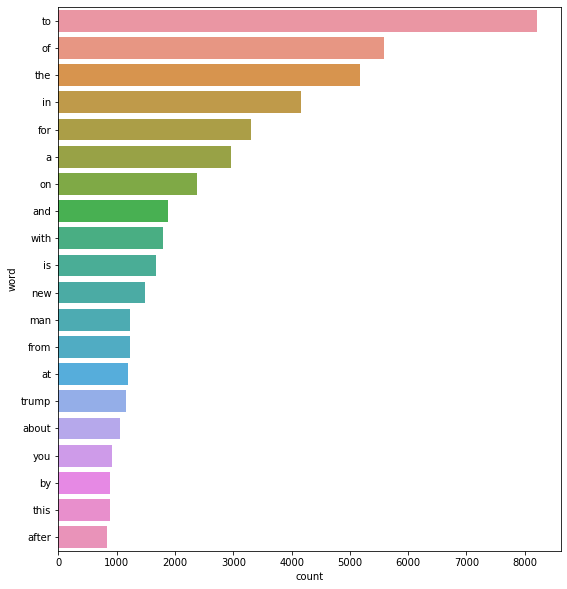

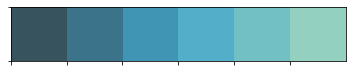

In [15]:
plt.figure(figsize=(9, 10))
sns.barplot(x='count',y= 'word', data=data);
sns.palplot(sns.color_palette("GnBu_d"))


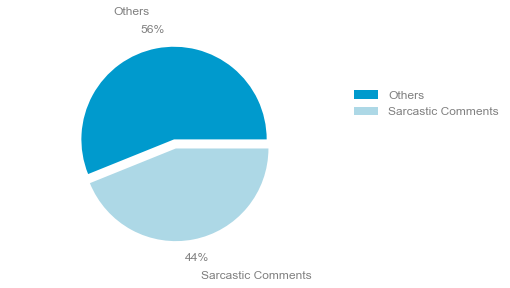

In [14]:
## Proportion of Sarcastic comments vs Others in the training data
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#808080'
plt.rcParams['axes.labelcolor']= '#0099CC'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
labels = ['Others', 
         'Sarcastic Comments']
dat = sarcasm_master['is_sarcastic'].value_counts()
sizes = (np.array((dat / dat.sum())*100))
percentages = [sizes[0], sizes[1]]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       autopct='%1.0f%%', colors=color_palette_list[0:2],
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

In [15]:
## Removing Punctuations

training_set['headline'] = training_set['headline'].apply(lambda x :re.sub(r'[^a-zA-Z\s]','', x ) )
training_set['headline'] = training_set['headline'].apply(lambda x : x.lower())


In [16]:
## Tokenization 
## Removing stopwords 

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def rem_stp(input_series):
    words = word_tokenize(input_series)
    a = [w for w in words if not w in stopwords] 
    return(a)
sarcasm_master['headline'] = sarcasm_master['headline'].apply(rem_stp) 

[nltk_data] Downloading package stopwords to C:\Users\Anjali
[nltk_data]     Shalimar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Creating single list of sarcastic headline words
sar_dat = sarcasm_master[sarcasm_master['is_sarcastic']==1]
sar_headlines = []
for index, row in sar_dat.iterrows():
    txt = row['headline']
    sar_headlines.append(txt)

import itertools
sar_words_list = list(itertools.chain(*sar_headlines))

p
other_dat = sarcasm_master[sarcasm_master['is_sarcastic']==0]
other_headlines = []
for index, row in other_dat.iterrows():
    txt = row['headline']
    other_headlines.append(txt)

import itertools
other_words_list = list(itertools.chain(*other_headlines))

In [18]:
## Top 25 most Frequent words
from collections import Counter
sar_cnt = Counter(sar_words_list)
oth_cnt = Counter(other_words_list)

#Dictonary to Dataframe
sar_cnt_df = pd.DataFrame(list(sar_cnt.items()), columns = ['Words', 'Freq'])
sar_cnt_df = sar_cnt_df.sort_values(by=['Freq'], ascending=False)
oth_cnt_df = pd.DataFrame(list(oth_cnt.items()), columns = ['Words', 'Freq'])
oth_cnt_df = oth_cnt_df.sort_values(by=['Freq'], ascending=False)

#Top 25
sar_cnt_df_25 = sar_cnt_df.head(25)
oth_cnt_df_25 = oth_cnt_df.head(25)

In [19]:
#Plotting the top 25 words
sar_plt  = ob.Bar(
    x=sar_cnt_df_25['Freq'],
    y=sar_cnt_df_25['Words'],
    name='Sarcasm',
    marker=dict(
        color='rgba(155, 89, 182, 0.6)',
        line=dict(
            color='rgba(155, 89, 182, 1.0)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)


fig = dict(data=[sar_plt])
iplot(fig)

NameError: name 'ob' is not defined

In [ ]:
oth_plt  = ob.Bar(
    x=oth_cnt_df_25['Freq'],
    y=oth_cnt_df_25['Words'],
    name='Acclaim',
    marker=dict(
        color='rgba(88, 214, 141, 0.6)',
        line=dict(
            color='rgba(88, 214, 141, 1.0)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

fig = dict(data=[oth_plt])
iplot(fig)

In [ ]:
## Lemmatization
from nltk.stem import WordNetLemmatizer
lmt = WordNetLemmatizer()
    
# sarcastic headlines 
sar_lem_list =  [lmt.lemmatize(word) for word in sar_words_list]


# other headlines 
oth_lem_list =  [lmt.lemmatize(word) for word in other_words_list]


In [20]:
## Bag of Words sarcasm headline
from matplotlib import pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud
sar_word_cloud = WordCloud(background_color='black', width=20000,height=10000).\
                generate(" ".join(sar_lem_list))
plt.imshow(sar_word_cloud)
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [21]:
# Bag of Words Other headline
from matplotlib import pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud
oth_word_cloud = WordCloud(background_color='black', width=20000,height=10000).\
                generate(" ".join(oth_lem_list))
plt.imshow(oth_word_cloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'